# **# Time-Aware Aircraft Engine Risk Prediction Using Probabilistic Degradation Modeling and Explainable Machine Learning**

In [145]:
# Balanced but still conservative

import numpy as np
import pandas as pd
import os

np.random.seed(42)

rows = 1000
data = []

health_index = 1.0
stress_memory = 0

for t in range(rows):

    # Maintenance reset every 300 steps
    if t % 300 == 0 and t != 0:
        health_index = 1.0
        stress_memory = 0

    # Flight phase cycle
    phase = t % 100

    if phase < 15:  # Taxi
        rpm = 2500 + np.random.normal(0, 50)
        load = 0.5
        altitude = 0
    elif phase < 30:  # Takeoff
        rpm = 6200 + np.random.normal(0, 80)
        load = 1.2
        altitude = 5000 + (phase-15)*300
    elif phase < 60:  # Cruise
        rpm = 5000 + np.random.normal(0, 60)
        load = 0.9
        altitude = 35000
    elif phase < 80:  # Descent
        rpm = 4200 + np.random.normal(0, 70)
        load = 0.75
        altitude = 20000 - (phase-60)*500
    else:  # Landing
        rpm = 3000 + np.random.normal(0, 60)
        load = 0.6
        altitude = 0

    # Moderate stress events
    if np.random.rand() < 0.07:
        stress_memory += 0.02

    if load > 1.1:
        stress_memory += 0.01

    temperature = 65 + load*25 + np.random.normal(0, 2)

    if temperature > 94:
        stress_memory += 0.008

    # Natural recovery
    stress_memory *= 0.994

    # Health degradation
    health_index -= stress_memory * 0.013
    health_index = max(health_index, 0.4)

    # Sensor influence from degradation
    vibration = 1.5 + (rpm/6000)*2 + (1 - health_index)*5 + np.random.normal(0, 0.25)
    temperature += (1 - health_index)*32
    oil_pressure = 38 - (1 - health_index)*16 - load*3 + np.random.normal(0, 1)
    acoustic = 60 + vibration*2 + np.random.normal(0, 2)

    # Conservative but balanced trigger
    risk_prob = 1 / (1 + np.exp(10*(health_index - 0.7)))
    risk = np.random.rand() < risk_prob


    data.append([
        t,
        round(rpm,2),
        round(vibration,2),
        round(temperature,2),
        round(oil_pressure,2),
        round(load,2),
        round(acoustic,2),
        round(altitude,2),
        risk
    ])

columns = [
    "time_step",
    "rpm",
    "vibration_rms",
    "sensor_temperature",
    "oil_pressure",
    "load_factor",
    "acoustic_db",
    "altitude_ft",
    "risk_label"
]

df = pd.DataFrame(data, columns=columns)

distribution = df["risk_label"].value_counts(normalize=True)

file_path = "./aircraft_vibration.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

df.to_csv(file_path, index=False)

file_path, distribution


('./aircraft_vibration.csv',
 risk_label
 True     0.583
 False    0.417
 Name: proportion, dtype: float64)

This cell loads the generated `aircraft_vibration.csv` file into a pandas DataFrame and displays the first few rows to confirm successful loading.

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('./aircraft_vibration.csv')
# print(df)

  return datetime.utcnow().replace(tzinfo=utc)



In [147]:
df.columns


Index(['time_step', 'rpm', 'vibration_rms', 'sensor_temperature',
       'oil_pressure', 'load_factor', 'acoustic_db', 'altitude_ft',
       'risk_label'],
      dtype='object')

In [148]:
df.head()

,time_step,rpm,vibration_rms,sensor_temperature,oil_pressure,load_factor,acoustic_db,altitude_ft,risk_label
0,0,2524.84,2.06,77.22,36.82,0.5,64.69,0,False
1,1,2550.53,2.22,76.35,35.92,0.5,62.59,0,False
2,2,2413.75,2.20,76.39,35.75,0.5,62.99,0,False
3,3,2393.02,2.40,82.64,36.61,0.5,63.77,0,False
4,4,2469.97,2.07,76.95,36.32,0.5,63.08,0,False


  return datetime.utcnow().replace(tzinfo=utc)



In [149]:
df.tail()

,time_step,rpm,vibration_rms,sensor_temperature,oil_pressure,load_factor,acoustic_db,altitude_ft,risk_label
995,995,3033.08,3.44,85.66,31.94,0.6,63.28,0,False
996,996,2894.94,3.14,86.46,34.36,0.6,67.76,0,False
997,997,2975.66,3.57,84.70,31.77,0.6,68.44,0,False
998,998,2993.51,3.89,89.22,33.18,0.6,70.63,0,False
999,999,2979.69,3.33,81.10,33.24,0.6,67.69,0,False


  return datetime.utcnow().replace(tzinfo=utc)



In [150]:
len(df)

1000

This cell generates descriptive statistics for each numerical column in the DataFrame, including count, mean, standard deviation, min, max, and quartiles. This helps in understanding the central tendency, dispersion, and range of the data.

In [151]:
df.describe()

  return datetime.utcnow().replace(tzinfo=utc)



,time_step,rpm,vibration_rms,sensor_temperature,oil_pressure,load_factor,acoustic_db,altitude_ft
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,4243.899110,4.724670,96.505130,29.814690,0.795000,69.425080,14615.000000
std,288.819436,1232.886141,1.222794,9.053485,3.861989,0.221414,3.124958,14494.839612
min,0.000000,2372.300000,1.690000,73.750000,22.960000,0.500000,59.440000,0.000000
25%,249.750000,3002.190000,3.620000,89.347500,26.300000,0.600000,67.172500,0.000000
50%,499.500000,4239.350000,5.175000,97.515000,28.795000,0.750000,69.505000,9850.000000
75%,749.250000,5024.947500,5.770000,103.472500,33.260000,0.900000,71.672500,35000.000000
max,999.000000,6414.770000,6.920000,119.470000,39.390000,1.200000,77.950000,35000.000000


  return datetime.utcnow().replace(tzinfo=utc)



In [152]:
df['risk_label'].value_counts()

,count
risk_label,
True,583
False,417


  return datetime.utcnow().replace(tzinfo=utc)



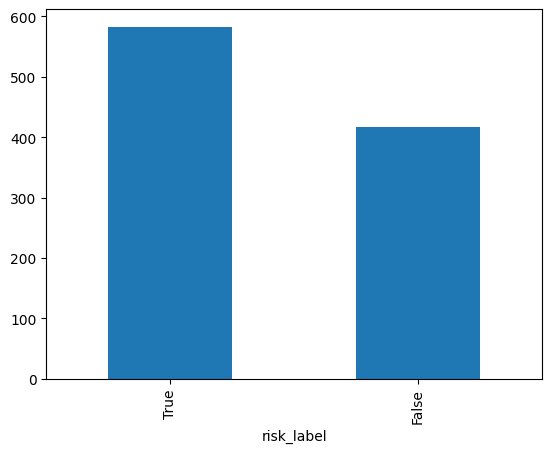

In [153]:
df['risk_label'].value_counts().plot(kind='bar')
plt.show()

  return datetime.utcnow().replace(tzinfo=utc)



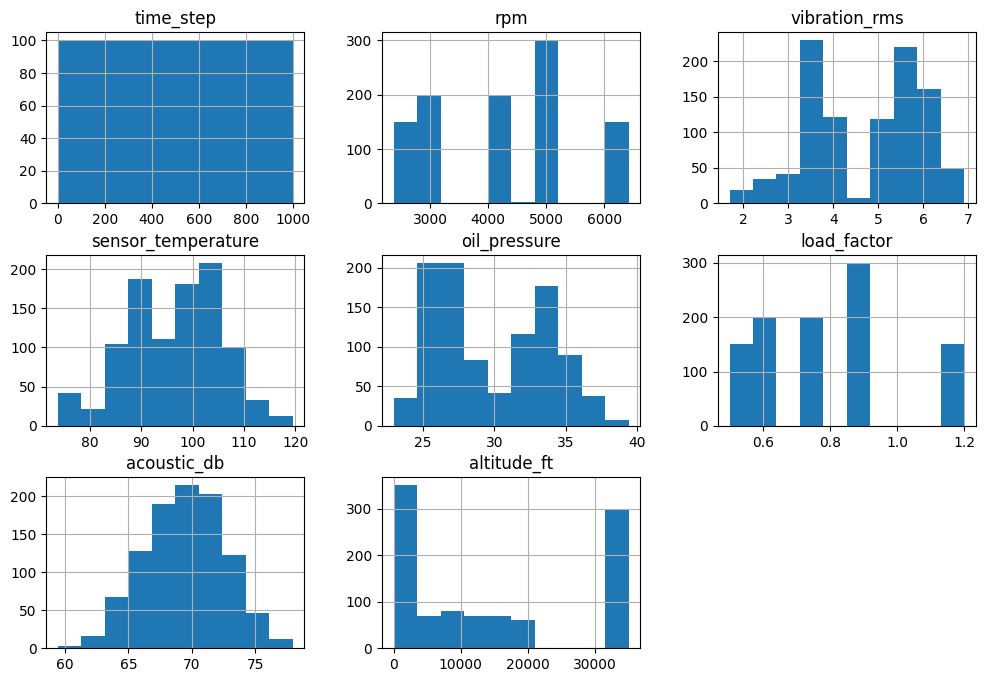

In [154]:
df.hist(figsize=(12,8))
plt.show()

This cell calculates the mean of all numerical features, grouped by the `risk_label`. This helps in comparing the average values of different parameters between safe and risky conditions.

In [155]:
df.groupby("risk_label").mean()


  return datetime.utcnow().replace(tzinfo=utc)



,time_step,rpm,vibration_rms,sensor_temperature,oil_pressure,load_factor,acoustic_db,altitude_ft
risk_label,,,,,,,,
False,499.465228,4263.957410,3.708441,90.143118,33.070408,0.800240,67.418273,14739.568345
True,499.524871,4229.552093,5.451544,101.055660,27.485986,0.791252,70.860480,14525.900515


  return datetime.utcnow().replace(tzinfo=utc)



  return datetime.utcnow().replace(tzinfo=utc)



<Axes: xlabel='time_step'>

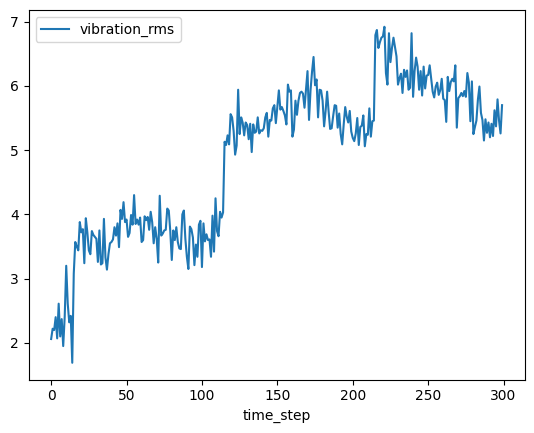

In [156]:
df[df["time_step"] < 300].plot(x="time_step", y="vibration_rms")


  return datetime.utcnow().replace(tzinfo=utc)



<Axes: xlabel='vibration_rms', ylabel='sensor_temperature'>

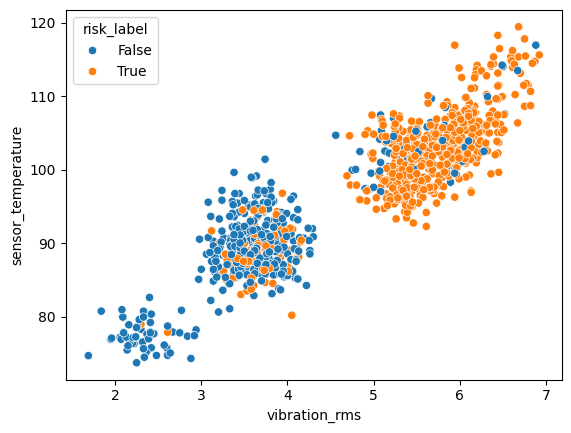

In [157]:
sns.scatterplot(
    x="vibration_rms",
    y="sensor_temperature",
    hue="risk_label",
    data=df
)


  return datetime.utcnow().replace(tzinfo=utc)



<Axes: xlabel='time_step'>

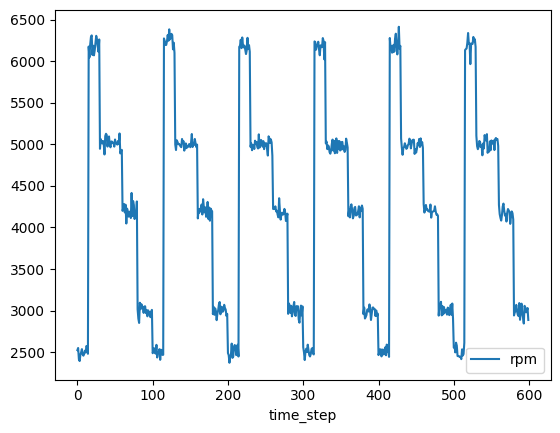

In [158]:
df[df["time_step"] < 600].plot(x="time_step", y="rpm")


  return datetime.utcnow().replace(tzinfo=utc)



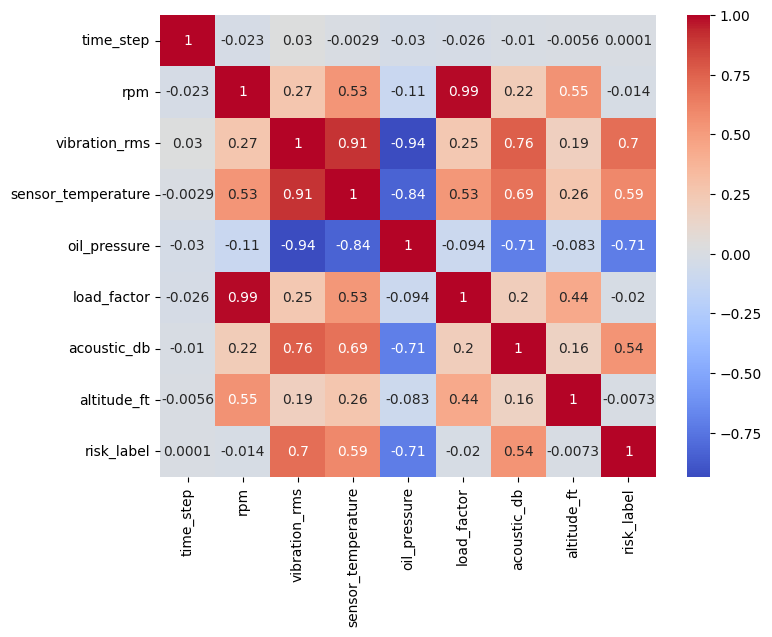

In [159]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


This code cell generates a heatmap of the correlation matrix for all numerical features in the DataFrame. The `figsize` argument sets the size of the plot, `annot=True` displays the correlation values on the heatmap, and `cmap="coolwarm"` sets the color scheme. This visualization helps identify highly correlated features and potential multicollinearity within the dataset.

  return datetime.utcnow().replace(tzinfo=utc)



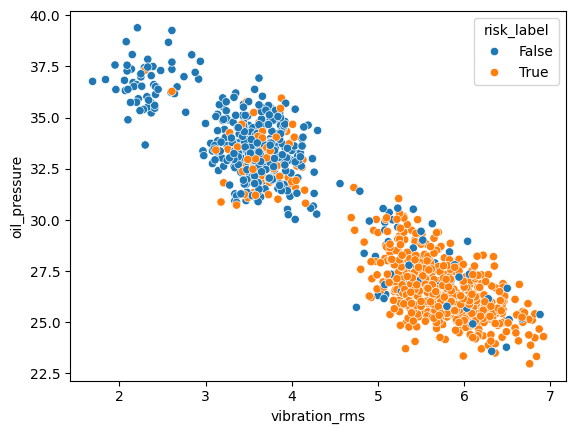

In [160]:
sns.scatterplot(
    x="vibration_rms",
    y="oil_pressure",
    hue="risk_label",
    data=df
)
plt.show()


This code cell generates a scatter plot using `seaborn` to visualize the relationship between `vibration_rms` (on the x-axis) and `oil_pressure` (on the y-axis). The `hue='risk_label'` argument colors the data points based on their `risk_label`, allowing for an easy visual identification of how these two parameters behave under risky versus non-risky conditions.

In [161]:
!pip install polars
import polars as pl
import pandas as pd

# Check if df is a pandas DataFrame before converting to Polars
if isinstance(df, pd.DataFrame):
    df = pl.from_pandas(df)
elif not isinstance(df, pl.DataFrame):
    print(f"Warning: df is of type {type(df)} and cannot be converted by pl.from_pandas.")

print(df.head())
print(type(df))

shape: (5, 9)
┌───────────┬─────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ time_step ┆ rpm     ┆ vibration_ ┆ sensor_te ┆ … ┆ load_fact ┆ acoustic_ ┆ altitude_ ┆ risk_labe │
│ ---       ┆ ---     ┆ rms        ┆ mperature ┆   ┆ or        ┆ db        ┆ ft        ┆ l         │
│ i64       ┆ f64     ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│           ┆         ┆ f64        ┆ f64       ┆   ┆ f64       ┆ f64       ┆ i64       ┆ bool      │
╞═══════════╪═════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0         ┆ 2524.84 ┆ 2.06       ┆ 77.22     ┆ … ┆ 0.5       ┆ 64.69     ┆ 0         ┆ false     │
│ 1         ┆ 2550.53 ┆ 2.22       ┆ 76.35     ┆ … ┆ 0.5       ┆ 62.59     ┆ 0         ┆ false     │
│ 2         ┆ 2413.75 ┆ 2.2        ┆ 76.39     ┆ … ┆ 0.5       ┆ 62.99     ┆ 0         ┆ false     │
│ 3         ┆ 2393.02 ┆ 2.4        ┆ 82.64     ┆ … ┆ 0.5       ┆ 63.77     ┆ 

This code cell first installs the `polars` library, a high-performance DataFrame library. It then imports `polars` and `pandas`. The code checks if the existing `df` is a pandas DataFrame and, if so, converts it to a Polars DataFrame. If it's already a Polars DataFrame, it does nothing. Finally, it prints the DataFrame and its type to confirm the conversion or state that it's already a Polars DataFrame.

This code cell filters the Polars DataFrame `df` to create `risk_df`, which contains only rows where `risk_label` is 1 (indicating a risky condition). It then prints the `risk_df` to display these filtered rows.

In [162]:
risk_df = df.filter(
    pl.col("risk_label") == 1
)
print(risk_df)

shape: (583, 9)
┌───────────┬─────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ time_step ┆ rpm     ┆ vibration_ ┆ sensor_te ┆ … ┆ load_fact ┆ acoustic_ ┆ altitude_ ┆ risk_labe │
│ ---       ┆ ---     ┆ rms        ┆ mperature ┆   ┆ or        ┆ db        ┆ ft        ┆ l         │
│ i64       ┆ f64     ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│           ┆         ┆ f64        ┆ f64       ┆   ┆ f64       ┆ f64       ┆ i64       ┆ bool      │
╞═══════════╪═════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 19        ┆ 6311.39 ┆ 3.88       ┆ 94.34     ┆ … ┆ 1.2       ┆ 69.52     ┆ 6200      ┆ true      │
│ 23        ┆ 6130.63 ┆ 3.94       ┆ 96.82     ┆ … ┆ 1.2       ┆ 69.57     ┆ 7400      ┆ true      │
│ 43        ┆ 4993.49 ┆ 3.67       ┆ 89.41     ┆ … ┆ 0.9       ┆ 66.41     ┆ 35000     ┆ true      │
│ 47        ┆ 5015.7  ┆ 3.93       ┆ 89.81     ┆ … ┆ 0.9       ┆ 69.57     

This code cell filters the Polars DataFrame `df` to create `critical_df`, which includes rows where both `vibration_rms` is greater than 5 and `oil_pressure` is less than 30. This helps identify potentially critical operating conditions within the dataset and prints the resulting filtered DataFrame.

In [163]:
critical_df = df.filter(
    (pl.col("vibration_rms") > 5) &
    (pl.col("oil_pressure") < 30)
)
print(critical_df.head())

shape: (5, 9)
┌───────────┬─────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ time_step ┆ rpm     ┆ vibration_ ┆ sensor_te ┆ … ┆ load_fact ┆ acoustic_ ┆ altitude_ ┆ risk_labe │
│ ---       ┆ ---     ┆ rms        ┆ mperature ┆   ┆ or        ┆ db        ┆ ft        ┆ l         │
│ i64       ┆ f64     ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│           ┆         ┆ f64        ┆ f64       ┆   ┆ f64       ┆ f64       ┆ i64       ┆ bool      │
╞═══════════╪═════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 116       ┆ 6244.78 ┆ 5.08       ┆ 107.47    ┆ … ┆ 1.2       ┆ 67.1      ┆ 5300      ┆ false     │
│ 117       ┆ 6195.37 ┆ 5.23       ┆ 107.05    ┆ … ┆ 1.2       ┆ 70.02     ┆ 5600      ┆ false     │
│ 119       ┆ 6240.08 ┆ 5.56       ┆ 103.56    ┆ … ┆ 1.2       ┆ 71.4      ┆ 6200      ┆ true      │
│ 120       ┆ 6315.76 ┆ 5.51       ┆ 106.17    ┆ … ┆ 1.2       ┆ 68.31     ┆ 

This code cell groups the Polars DataFrame `df` by `risk_label` and calculates the mean for `vibration_rms`, `sensor_temperature`, `oil_pressure`, and `acoustic_db` for each group. This comparison helps in understanding the average sensor readings under risky vs. non-risky conditions and prints the aggregated results.

**Comparing** means of risks and unrisks

In [164]:
risk_unrisk = df.group_by("risk_label").agg([
    pl.col("vibration_rms").mean().alias("avg_vibration"),
    pl.col("sensor_temperature").mean().alias("avg_temp"),
    pl.col("oil_pressure").mean().alias("avg_oil_pressure"),
    pl.col("acoustic_db").mean().alias("avg_acoustic")
])

print(risk_unrisk)

shape: (2, 5)
┌────────────┬───────────────┬───────────┬──────────────────┬──────────────┐
│ risk_label ┆ avg_vibration ┆ avg_temp  ┆ avg_oil_pressure ┆ avg_acoustic │
│ ---        ┆ ---           ┆ ---       ┆ ---              ┆ ---          │
│ bool       ┆ f64           ┆ f64       ┆ f64              ┆ f64          │
╞════════════╪═══════════════╪═══════════╪══════════════════╪══════════════╡
│ false      ┆ 3.708441      ┆ 90.143118 ┆ 33.070408        ┆ 67.418273    │
│ true       ┆ 5.451544      ┆ 101.05566 ┆ 27.485986        ┆ 70.86048     │
└────────────┴───────────────┴───────────┴──────────────────┴──────────────┘


This code cell selects and calculates the maximum `vibration_rms`, maximum `sensor_temperature`, and minimum `oil_pressure` across the entire dataset using Polars expressions. This provides key boundary values for these critical parameters and prints the result as a single-row DataFrame.

In [165]:
df.select([
    pl.col("vibration_rms").max().alias("max_vibration"),
    pl.col("sensor_temperature").max().alias("max_temp"),
    pl.col("oil_pressure").min().alias("min_oil_pressure")
])

max_vibration,max_temp,min_oil_pressure
f64,f64,f64
6.92,119.47,22.96


In this synthetic aircraft monitoring dataset, every 100 consecutive time steps represent one simulated flight cycle. Each cycle models the typical operational phases of a flight, including taxi, takeoff, cruise, descent, and landing. The time_step variable represents sequential sensor readings rather than actual minutes. By grouping data into 100-step blocks, we simulate repeated flight operations and allow degradation effects to accumulate across cycles. This structure helps in analyzing vibration trends, stress buildup, and maintenance impact over multiple simulated flights while keeping the dataset organized and suitable for predictive modeling.

In [166]:
df.with_columns(
    (pl.col("time_step") // 100).alias("cycle")
).group_by("cycle").agg(
    pl.col("vibration_rms").mean().alias("cycle_avg_vibration")
)


cycle,cycle_avg_vibration
i64,f64
3,3.4339
9,3.4007
7,5.1897
0,3.4796
6,3.4528
5,5.8931
2,5.892
1,5.2729
4,5.3482


This code cell installs the `great_expectations` library, specifically version `0.15.50`. This library is a powerful tool used for data quality, validation, and documentation.

In [167]:
!pip install great_expectations==0.15.50


This code cell initializes a Great Expectations Data Context. This context is essential for configuring and managing data validation, expectation suites, and data documentation.

In [168]:
!great_expectations init

Using v3 (Batch Request) API

  ___              _     ___                  _        _   _
 / __|_ _ ___ __ _| |_  | __|_ ___ __  ___ __| |_ __ _| |_(_)___ _ _  ___
| (_ | '_/ -_) _` |  _| | _|\ \ / '_ \/ -_) _|  _/ _` |  _| / _ \ ' \(_-<
 \___|_| \___\__,_|\__| |___/_\_\ .__/\___\__|\__\__,_|\__|_\___/_||_/__/
                                |_|
             ~ Always know what to expect from your data ~

This looks like an existing project that appears complete! You are ready to roll.



This code cell reloads the `aircraft_vibration.csv` file into a pandas DataFrame `dfp` and displays the first few rows. This is often done to ensure the data is in the correct format for subsequent analysis or validation steps, especially when transitioning between libraries or steps.

In [169]:
dfp = pd.read_csv("./aircraft_vibration.csv")
dfp.head()

  return datetime.utcnow().replace(tzinfo=utc)



,time_step,rpm,vibration_rms,sensor_temperature,oil_pressure,load_factor,acoustic_db,altitude_ft,risk_label
0,0,2524.84,2.06,77.22,36.82,0.5,64.69,0,False
1,1,2550.53,2.22,76.35,35.92,0.5,62.59,0,False
2,2,2413.75,2.20,76.39,35.75,0.5,62.99,0,False
3,3,2393.02,2.40,82.64,36.61,0.5,63.77,0,False
4,4,2469.97,2.07,76.95,36.32,0.5,63.08,0,False


  return datetime.utcnow().replace(tzinfo=utc)



This code cell performs data validation using the `great_expectations` library. It loads the `aircraft_vibration.csv` into a pandas DataFrame, converts it to a Great Expectations DataFrame, and then defines several expectations (e.g., column values not null, values within specific ranges, and `risk_label` values in a set). Finally, it validates the data against these expectations and prints the `results`.

In [170]:
import great_expectations as ge


# Load your dataframe
dfp = pd.read_csv("aircraft_vibration.csv")

# Convert to Great Expectations dataframe
df_ge = ge.from_pandas(dfp)

# Now define expectations
df_ge.expect_column_values_to_not_be_null("rpm")
df_ge.expect_column_values_to_not_be_null("vibration_rms")
df_ge.expect_column_values_to_not_be_null("sensor_temperature")
df_ge.expect_column_values_to_not_be_null("oil_pressure")
df_ge.expect_column_values_to_not_be_null("load_factor")
df_ge.expect_column_values_to_not_be_null("acoustic_db")
df_ge.expect_column_values_to_not_be_null("altitude_ft")

df_ge.expect_column_values_to_be_between("rpm", min_value=2300, max_value=6400)
df_ge.expect_column_values_to_be_between("vibration_rms", min_value=1.5, max_value=7.5)
df_ge.expect_column_values_to_be_between("sensor_temperature", min_value=70, max_value=120)
df_ge.expect_column_values_to_be_between("oil_pressure", min_value=20, max_value=40)
df_ge.expect_column_values_to_be_between("load_factor", min_value=0.4, max_value=1.3)
df_ge.expect_column_values_to_be_between("acoustic_db", min_value=50, max_value=80)
df_ge.expect_column_values_to_be_between("altitude_ft", min_value=0, max_value=40000)

df_ge.expect_column_values_to_be_in_set("risk_label", [0,1])

# Validate
results = df_ge.validate()

results


  return datetime.utcnow().replace(tzinfo=utc)



{
  "success": false,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "expectation_type": "expect_column_values_to_not_be_null",
        "kwargs": {
          "column": "rpm",
          "result_format": "BASIC"
        },
        "meta": {}
      },
      "result": {
        "element_count": 1000,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "partial_unexpected_list": []
      },
      "meta": {},
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      }
    },
    {
      "success": false,
      "expectation_config": {
        "expectation_type": "expect_column_values_to_be_between",
        "kwargs": {
          "column": "rpm",
          "min_value": 2300,
          "max_value": 6400,
          "result_format": "BASIC"
        },
        "meta": {}
      },
      "result": {
        "element_count": 

This code cell first prints the current type of the DataFrame `df` (which is a Polars DataFrame at this stage). It then prepares the data for machine learning by separating the features (`X`) from the target variable (`y`). The `risk_label` and `time_step` columns are dropped to form `X`, while `y` becomes the `risk_label`.

In [171]:
print(type(df))

X = df.drop(["risk_label", "time_step"])
y = df["risk_label"]

<class 'polars.dataframe.frame.DataFrame'>


This code cell splits the dataset into training and testing sets using `train_test_split` from `sklearn.model_selection`. It allocates 80% of the data for training (`X_train`, `y_train`) and 20% for testing (`X_test`, `y_test`). A `random_state` ensures reproducibility, and `stratify=y` maintains the proportion of `risk_label` in both subsets, which is crucial for imbalanced datasets.

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


  return datetime.utcnow().replace(tzinfo=utc)



This code cell initializes a `RandomForestClassifier` model, sets a `random_state` for reproducibility, and then trains the model using the training data (`X_train`, `y_train`).

This code cell uses the trained `RandomForestClassifier` model (`model`) to make predictions (`y_pred`) on the unseen test dataset (`X_test`).

### This code cell initializes a RandomForestClassifier model, sets a random_state for reproducibility, and then trains the model using the training data (X_train, y_train).This code cell initializes a RandomForestClassifier model, sets a random_state for reproducibility, and then trains the model using the training data (X_train, y_train).This code cell evaluates the performance of the `RandomForestClassifier` model using several common classification metrics: accuracy score, a confusion matrix, and a detailed classification report. These metrics provide insights into the model's predictive capability and potential biases.

In [173]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


  return datetime.utcnow().replace(tzinfo=utc)



Accuracy: 0.84

Confusion Matrix:
[[69 14]
 [18 99]]

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.83      0.81        83
        True       0.88      0.85      0.86       117

    accuracy                           0.84       200
   macro avg       0.83      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [174]:
print(X.columns)


['rpm', 'vibration_rms', 'sensor_temperature', 'oil_pressure', 'load_factor', 'acoustic_db', 'altitude_ft']


This code cell initializes and trains a `LogisticRegression` model, then makes predictions on the test set, and finally evaluates its performance using accuracy, confusion matrix, and a classification report. This allows for a comparison of a linear model's performance against tree-based models like Random Forest.

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

  return datetime.utcnow().replace(tzinfo=utc)



Accuracy: 0.83

Confusion Matrix:
[[ 63  20]
 [ 14 103]]

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.76      0.79        83
        True       0.84      0.88      0.86       117

    accuracy                           0.83       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.83      0.83       200



This code cell prints the column names of the feature set `X`, confirming which features are being used for model training and prediction. This is often done to verify the input features before training a new model or making predictions.

In [176]:
print(X.columns)

['rpm', 'vibration_rms', 'sensor_temperature', 'oil_pressure', 'load_factor', 'acoustic_db', 'altitude_ft']


In [177]:
safe_data = pd.DataFrame([{
    "rpm": 4200,
    "vibration_rms": 3.2,
    "sensor_temperature": 88,
    "oil_pressure": 34,
    "load_factor": 0.75,
    "acoustic_db": 66,
    "altitude_ft": 30000
}])

near_risk_data = pd.DataFrame([{
    "rpm": 4800,
    "vibration_rms": 4.8,
    "sensor_temperature": 95,
    "oil_pressure": 29,
    "load_factor": 0.85,
    "acoustic_db": 70,
    "altitude_ft": 35000
}])


risk_data = pd.DataFrame([{
    "rpm": 5000,
    "vibration_rms": 6.2,
    "sensor_temperature": 105,
    "oil_pressure": 24,
    "load_factor": 0.9,
    "acoustic_db": 74,
    "altitude_ft": 35000
}])

print(model.predict(safe_data))
print(model.predict(near_risk_data))
print(model.predict(risk_data))



  return datetime.utcnow().replace(tzinfo=utc)



[False]
[ True]
[ True]


In [178]:

# data = [
#     [0, 2524.84, 2.06, 77.22, 36.82, 0.5, 64.69, 0, 0],
#     [1, 2550.53, 2.49, 76.56, 36.04, 0.5, 64.04, 0, 0],
#     [15, 6225.16, 3.82, 95.2, 33.69, 1.2, 66.98, 5000, 0],
#     [30, 4946.63, 3.53, 86.87, 34.56, 0.9, 69.47, 35000, 0],
#     [31, 5032.28, 4.03, 88.08, 35.37, 0.9, 66.35, 35000, 0],
# ]

# data = [
#     [92, 3015.58, 3.38, 85.63, 32.75, 0.6, 72.33, 0, 0],
#     [93, 2903.34, 3.55, 85.83, 33.43, 0.6, 65.95, 0, 0],
#     [94, 3050.14, 3.53, 85.41, 34.8, 0.6, 63.53, 0, 0],
#     [95, 2938.04, 3.54, 88.52, 32.4, 0.6, 66.78, 0, 0],
#     [96, 3070.07, 3.61, 88.4, 32.84, 0.6, 66.58, 0, 0],
#     [97, 2980.86, 4.26, 88.58, 33.07, 0.6, 67.87, 0, 0],
#     [98, 3072.07, 3.62, 87.29, 29.91, 0.6, 69.35, 0, 1],
#     [99, 2949.39, 3.97, 87.74, 32.98, 0.6, 68.14, 0, 1]
# ]


data = [
    [4100, 3.1, 86, 35, 0.75, 65, 30000],   # Safe
    [4900, 4.7, 94, 30, 0.85, 69, 35000],   # Borderline
    [5200, 6.4, 108, 23, 0.95, 75, 35000],  # High Risk
    [2800, 2.5, 78, 37, 0.6, 63, 0],        # Safe
    [5000, 5.8, 101, 27, 0.9, 72, 35000],   # Risk
    [4600, 4.2, 92, 31, 0.8, 68, 33000],    # Near Risk
    [5300, 6.9, 110, 21, 1.0, 77, 36000],   # Strong Risk
    [3000, 3.0, 85, 34, 0.65, 64, 5000]     # Safe
]


columns = [
    # "time_step",
    "rpm",
    "vibration_rms",
    "sensor_temperature",
    "oil_pressure",
    "load_factor",
    "acoustic_db",
    "altitude_ft",
    # "risk_label"
]

df_new = pd.DataFrame(data, columns=columns)

X_new = df_new[[
    "rpm",
    "vibration_rms",
    "sensor_temperature",
    "oil_pressure",
    "load_factor",
    "acoustic_db",
    "altitude_ft"
]]

prediction = lr.predict(X_new)
print(prediction)
print(lr.predict_proba(X_new))


#threshold 0.35
prob = lr.predict_proba(X_new)[:,1]
pred = (prob > 0.35).astype(int)
print(pred)

  return datetime.utcnow().replace(tzinfo=utc)



[False  True  True False  True False  True False]
[[0.92025404 0.07974596]
 [0.48404912 0.51595088]
 [0.03137283 0.96862717]
 [0.94627997 0.05372003]
 [0.11619938 0.88380062]
 [0.64614595 0.35385405]
 [0.01277972 0.98722028]
 [0.85822233 0.14177767]]
[0 1 1 0 1 1 1 0]


In [179]:
data = [
    # Safe zone
    [3900, 2.9, 84, 36, 0.7, 64, 28000],
    [4200, 3.4, 87, 34, 0.75, 66, 30000],

    # Slightly elevated but probably safe
    [4500, 4.0, 90, 32, 0.8, 68, 32000],

    # Borderline cases
    [4800, 4.8, 96, 29, 0.85, 70, 35000],
    [5000, 5.2, 99, 28, 0.9, 72, 35000],

    # Clear risk
    [5200, 6.1, 104, 24, 0.95, 74, 36000],
    [5400, 6.8, 110, 21, 1.0, 78, 37000],

    # Low RPM safe
    [2700, 2.4, 75, 37, 0.6, 62, 0],

    # Oil pressure drop only
    [4300, 3.5, 88, 27, 0.75, 67, 30000],

    # High acoustic anomaly
    [4600, 4.3, 92, 31, 0.8, 76, 33000],

    # Strong degradation pattern
    [5100, 6.5, 108, 22, 0.95, 79, 35000],

    # Moderate cruise
    [4700, 4.1, 91, 33, 0.82, 68, 34000]
]

columns = [
    # "time_step",
    "rpm",
    "vibration_rms",
    "sensor_temperature",
    "oil_pressure",
    "load_factor",
    "acoustic_db",
    "altitude_ft",
    # "risk_label"
]

df_new = pd.DataFrame(data, columns=columns)

X_new = df_new[[
    "rpm",
    "vibration_rms",
    "sensor_temperature",
    "oil_pressure",
    "load_factor",
    "acoustic_db",
    "altitude_ft"
]]

prediction = lr.predict(X_new)
print(prediction)
print(lr.predict_proba(X_new))


  return datetime.utcnow().replace(tzinfo=utc)



[False False False  True  True  True  True False False False  True False]
[[0.94159717 0.05840283]
 [0.87436333 0.12563667]
 [0.72575381 0.27424619]
 [0.3916483  0.6083517 ]
 [0.25053126 0.74946874]
 [0.0579158  0.9420842 ]
 [0.01486248 0.98513752]
 [0.95502117 0.04497883]
 [0.72615142 0.27384858]
 [0.56134538 0.43865462]
 [0.02106681 0.97893319]
 [0.74122068 0.25877932]]


In [180]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=1
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

data = [
    # Safe zone
    [3900, 2.9, 84, 36, 0.7, 64, 28000],
    [4200, 3.4, 87, 34, 0.75, 66, 30000],

    # Slightly elevated but probably safe
    [4500, 4.0, 90, 32, 0.8, 68, 32000],

    # Borderline cases
    [4800, 4.8, 96, 29, 0.85, 70, 35000],
    [5000, 5.2, 99, 28, 0.9, 72, 35000],

    # Clear risk
    [5200, 6.1, 104, 24, 0.95, 74, 36000],
    [5400, 6.8, 110, 21, 1.0, 78, 37000],

    # Low RPM safe
    [2700, 2.4, 75, 37, 0.6, 62, 0],

    # Oil pressure drop only
    [4300, 3.5, 88, 27, 0.75, 67, 30000],

    # High acoustic anomaly
    [4600, 4.3, 92, 31, 0.8, 76, 33000],

    # Strong degradation pattern
    [5100, 6.5, 108, 22, 0.95, 79, 35000],

    # Moderate cruise
    [4700, 4.1, 91, 33, 0.82, 68, 34000]
]

columns = [
    # "time_step",
    "rpm",
    "vibration_rms",
    "sensor_temperature",
    "oil_pressure",
    "load_factor",
    "acoustic_db",
    "altitude_ft",
    # "risk_label"
]

df_new = pd.DataFrame(data, columns=columns)

X_new = df_new[[
    "rpm",
    "vibration_rms",
    "sensor_temperature",
    "oil_pressure",
    "load_factor",
    "acoustic_db",
    "altitude_ft"
]]

prediction = xgb.predict(X_new)
print(prediction)
print(xgb.predict_proba(X_new))


  return datetime.utcnow().replace(tzinfo=utc)



Accuracy: 0.79

Confusion Matrix:
[[60 23]
 [19 98]]

Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.72      0.74        83
        True       0.81      0.84      0.82       117

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.79      0.79       200

[0 1 0 1 1 1 1 0 0 1 1 0]
[[0.97082806 0.02917193]
 [0.20942342 0.7905766 ]
 [0.72265637 0.2773436 ]
 [0.19134545 0.80865455]
 [0.11289471 0.8871053 ]
 [0.05509782 0.9449022 ]
 [0.10069191 0.8993081 ]
 [0.9954293  0.00457072]
 [0.66957194 0.33042806]
 [0.40554136 0.59445864]
 [0.0760926  0.9239074 ]
 [0.9174037  0.08259628]]


In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Logistic
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    eval_metric="logloss",
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)


models = {
    "Logistic": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))


  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

  return datetime.utcnow().replace(tzinfo=utc)

Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)

  return datetime.utcnow().replace(tzinfo=utc)




Logistic
              precision    recall  f1-score   support

       False       0.82      0.76      0.79        83
        True       0.84      0.88      0.86       117

    accuracy                           0.83       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.83      0.83       200

ROC AUC: 0.9080424261147153

Random Forest
              precision    recall  f1-score   support

       False       0.79      0.83      0.81        83
        True       0.88      0.85      0.86       117

    accuracy                           0.84       200
   macro avg       0.83      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

ROC AUC: 0.908866234167439

XGBoost
              precision    recall  f1-score   support

       False       0.76      0.72      0.74        83
        True       0.81      0.84      0.82       117

    accuracy                           0.79       200
   macro avg       0.78      0.78      

In [182]:
data = [
    # Very safe
    [2600, 2.2, 74, 38, 0.55, 61, 0],
    [2800, 2.6, 78, 36, 0.6, 63, 2000],

    # Normal cruise safe
    [4100, 3.1, 85, 35, 0.75, 65, 30000],
    [4300, 3.6, 88, 33, 0.8, 67, 32000],

    # Slightly elevated
    [4500, 4.2, 91, 31, 0.82, 69, 33000],
    [4700, 4.5, 93, 30, 0.85, 70, 34000],

    # Borderline
    [4900, 4.9, 96, 29, 0.88, 72, 35000],
    [5000, 5.1, 98, 28, 0.9, 73, 35000],

    # Oil drop but low vibration
    [4200, 3.4, 87, 26, 0.75, 66, 30000],

    # High acoustic only
    [4600, 4.0, 90, 32, 0.8, 78, 33000],

    # Clear degradation
    [5100, 6.2, 104, 24, 0.95, 75, 36000],
    [5300, 6.8, 109, 22, 1.0, 79, 37000],

    # Strong stress
    [5500, 7.1, 112, 20, 1.05, 81, 38000],

    # Moderate risk
    [5050, 5.7, 100, 27, 0.92, 74, 35000],

    # Slight thermal rise
    [4800, 4.3, 97, 31, 0.86, 69, 34000],

    # Slight vibration only
    [4400, 4.6, 89, 34, 0.8, 68, 32000],

    # Safe descent
    [3900, 3.0, 83, 36, 0.7, 64, 28000],

    # Cruise with mild oil drop
    [4600, 4.1, 92, 28, 0.82, 70, 33000],

    # Extreme case
    [5600, 7.5, 115, 18, 1.1, 83, 39000],

    # Normal stable
    [4200, 3.2, 86, 35, 0.75, 66, 30000]
]

import pandas as pd

columns = [
    "rpm",
    "vibration_rms",
    "sensor_temperature",
    "oil_pressure",
    "load_factor",
    "acoustic_db",
    "altitude_ft"
]

X_new = pd.DataFrame(data, columns=columns)

models = {
    "Logistic": lr,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    print(f"\n{name}")
    pred = model.predict(X_new)
    prob = model.predict_proba(X_new)[:,1]
    print("Predictions:", pred)
    print("Risk Probabilities:", prob)


  return datetime.utcnow().replace(tzinfo=utc)




Logistic
Predictions: [False False False False False False  True  True False False  True  True
  True  True False False False False  True False]
Risk Probabilities: [0.031551   0.06690881 0.07780468 0.17028861 0.36457038 0.47895933
 0.6386024  0.72528137 0.27097843 0.32252941 0.95227325 0.98410666
 0.99156764 0.87034074 0.39433146 0.39463983 0.06415432 0.42079916
 0.9962575  0.08792244]

Random Forest


  return datetime.utcnow().replace(tzinfo=utc)



Predictions: [False False False False False False  True  True  True  True  True  True
  True  True False False False  True  True False]
Risk Probabilities: [0.045 0.09  0.25  0.215 0.34  0.42  0.62  0.725 0.58  0.64  0.88  0.635
 0.67  0.915 0.19  0.46  0.21  0.575 0.745 0.25 ]

XGBoost
Predictions: [0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0]
Risk Probabilities: [0.00457072 0.0125392  0.02813161 0.1453688  0.06125305 0.42371222
 0.68009704 0.7579278  0.94218874 0.8234826  0.94335437 0.9251398
 0.8993081  0.97361225 0.07838757 0.61271495 0.02446443 0.7367551
 0.8993081  0.08413582]


  return datetime.utcnow().replace(tzinfo=utc)




===== ENGINEERED FEATURE STATISTICS =====
       thermal_stress  lubrication_risk  mechanical_stress  degradation_score
count     1000.000000       1000.000000        1000.000000        1000.000000
mean        77.780249          0.166028        3642.953700           4.944354
std         26.133411          0.060420        1995.901178           1.396055
min         36.875000          0.045961        1186.150000           1.517950
25%         58.302000          0.109364        1801.314000           3.705625
50%         77.105250          0.182861        3179.512500           5.477525
75%         93.906000          0.217742        4522.452750           6.115400
max        143.364000          0.294425        7697.724000           7.469150


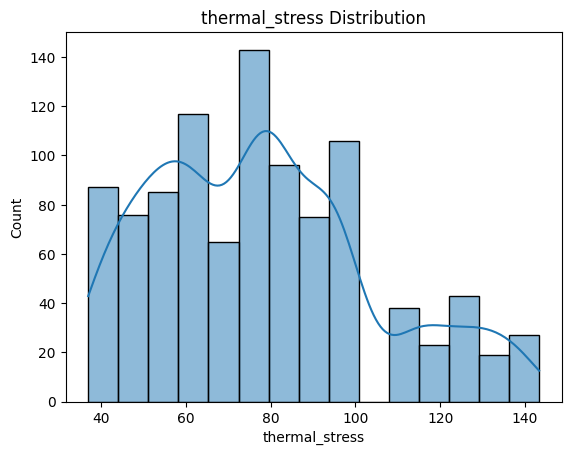

  return datetime.utcnow().replace(tzinfo=utc)



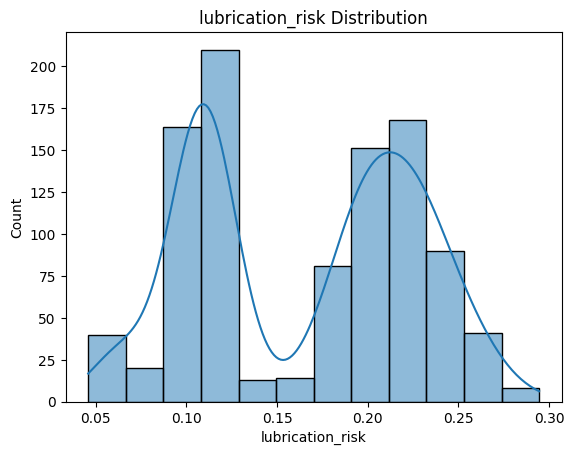

  return datetime.utcnow().replace(tzinfo=utc)



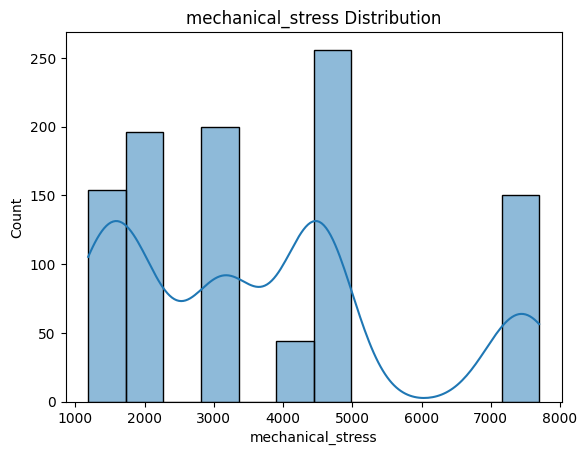

  return datetime.utcnow().replace(tzinfo=utc)



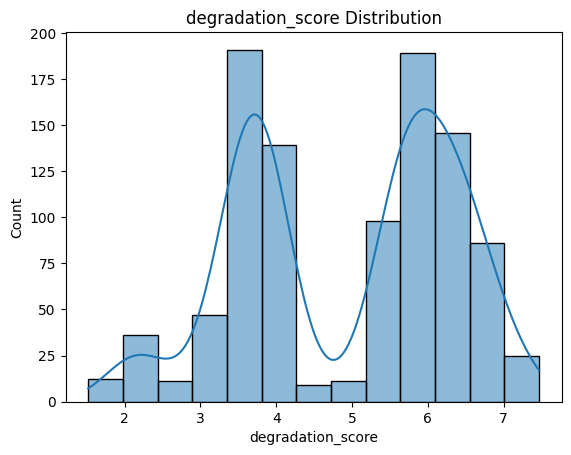

  return datetime.utcnow().replace(tzinfo=utc)



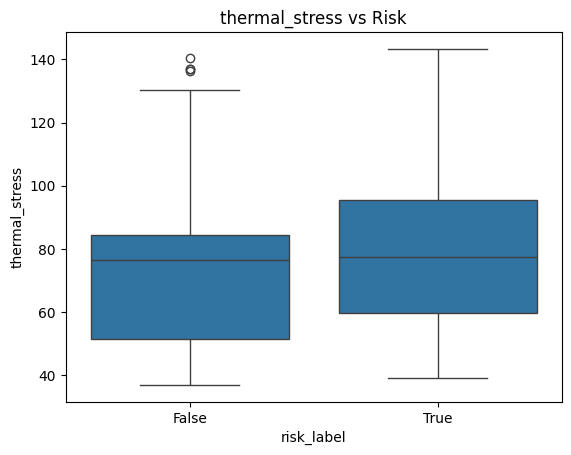

  return datetime.utcnow().replace(tzinfo=utc)



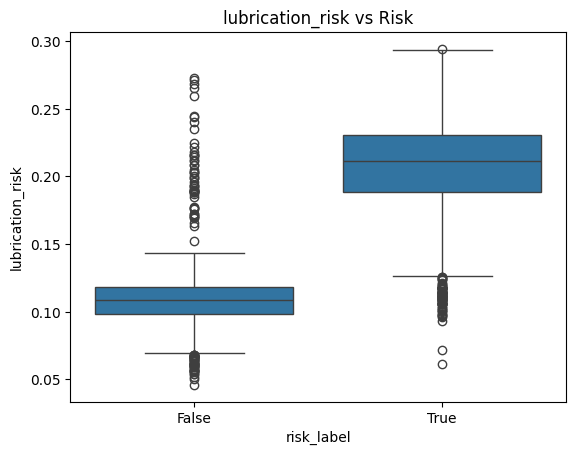

  return datetime.utcnow().replace(tzinfo=utc)



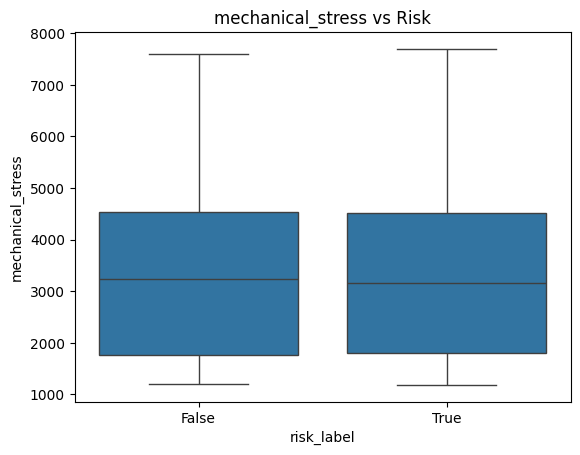

  return datetime.utcnow().replace(tzinfo=utc)



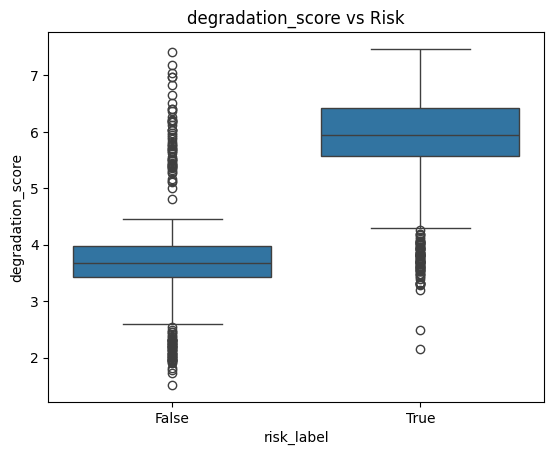

  return datetime.utcnow().replace(tzinfo=utc)




===== CORRELATION WITH RISK =====
risk_label            1.000000
lubrication_risk      0.711653
degradation_score     0.703835
vibration_rms         0.703217
sensor_temperature    0.594607
acoustic_db           0.543391
thermal_stress        0.141650
time_step             0.000102
altitude_ft          -0.007272
rpm                  -0.013766
load_factor          -0.020025
mechanical_stress    -0.033007
oil_pressure         -0.713324
Name: risk_label, dtype: float64


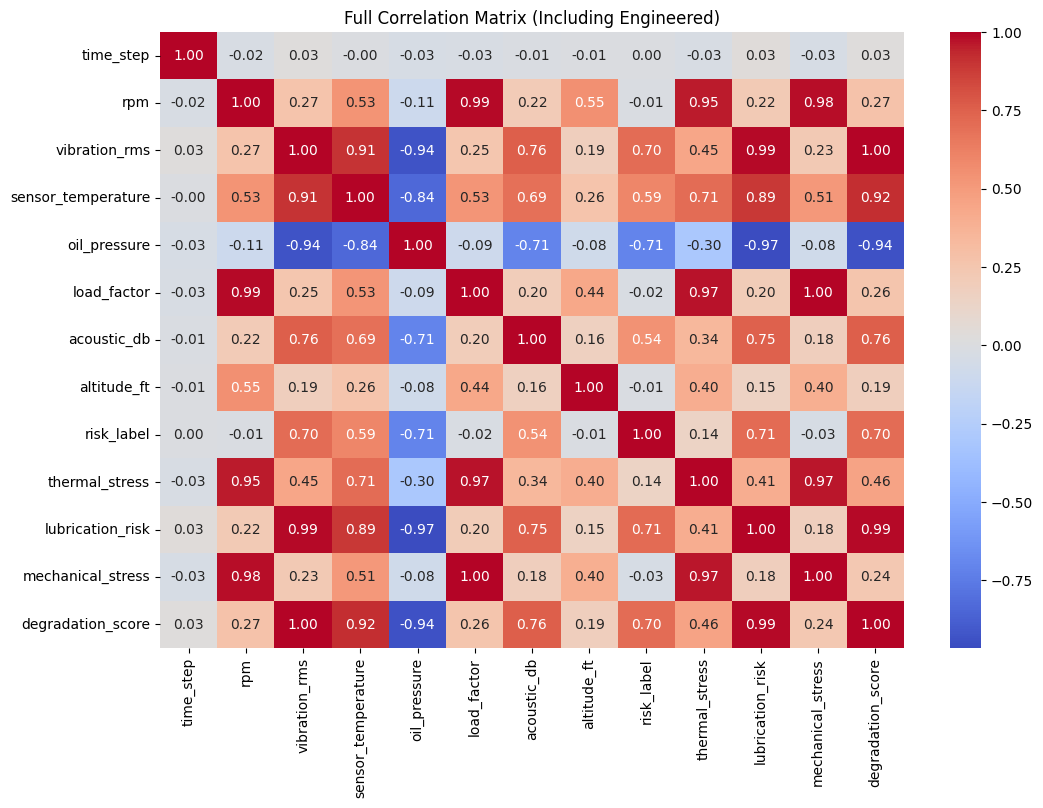

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl

def engineered_feature_eda(df):

    # Convert to pandas DataFrame if it's a Polars DataFrame
    if isinstance(df, pl.DataFrame):
        df = df.to_pandas()

    df = df.copy()

    # -----------------------------
    # 1⏱ Create Engineered Features
    # -----------------------------
    df["thermal_stress"] = df["sensor_temperature"] * df["load_factor"]

    df["lubrication_risk"] = (
        df["vibration_rms"] / (df["oil_pressure"] + 1e-6)
    )

    df["mechanical_stress"] = df["rpm"] * df["load_factor"]

    df["degradation_score"] = (
        df["vibration_rms"] +
        df["sensor_temperature"]/100 -
        df["oil_pressure"]/40
    )

    engineered_cols = [
        "thermal_stress",
        "lubrication_risk",
        "mechanical_stress",
        "degradation_score"
    ]

    print("\n===== ENGINEERED FEATURE STATISTICS =====")
    print(df[engineered_cols].describe())

    # -----------------------------
    # 2⏱ Distribution Check
    # -----------------------------
    for col in engineered_cols:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f"{col} Distribution")
        plt.show()

    # -----------------------------
    # 3⏱ Risk vs Safe Separation
    # -----------------------------
    for col in engineered_cols:
        plt.figure()
        sns.boxplot(x="risk_label", y=col, data=df)
        plt.title(f"{col} vs Risk")
        plt.show()

    # -----------------------------
    # 4⏱ Correlation Analysis
    # -----------------------------
    print("\n===== CORRELATION WITH RISK =====")
    print(df.corr()["risk_label"].sort_values(ascending=False))

    # -----------------------------
    # 5⏱ Multicollinearity Check
    # -----------------------------
    plt.figure(figsize=(12,8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Full Correlation Matrix (Including Engineered)")
    plt.show()

engineered_feature_eda(df)

This code cell generates two Kernel Density Estimate (KDE) plots. The first shows the distribution of `vibration_rms` separated by `risk_label`. The second first calculates a new `lubrication_risk` feature (`vibration_rms` divided by `oil_pressure`) and then plots its distribution, also separated by `risk_label`. These plots help visualize how the densities of these features change with respect to the risk category.

  return datetime.utcnow().replace(tzinfo=utc)



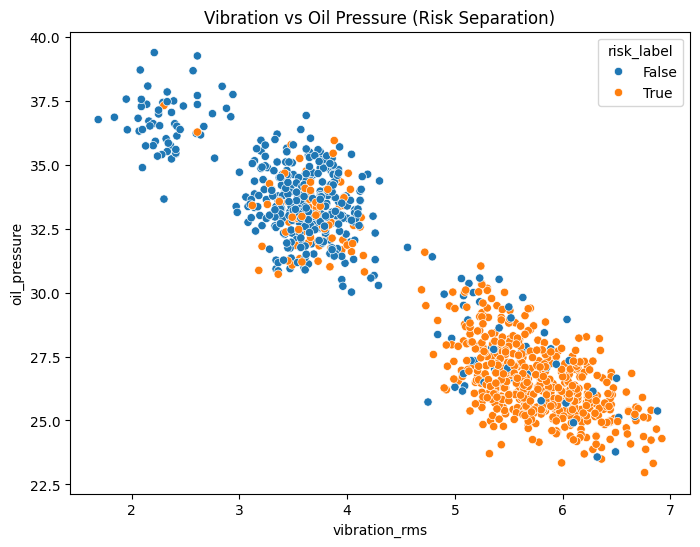

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Interaction: vibration vs oil pressure
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="vibration_rms",
    y="oil_pressure",
    hue="risk_label",
    data=df
)
plt.title("Vibration vs Oil Pressure (Risk Separation)")
plt.show()

  return datetime.utcnow().replace(tzinfo=utc)



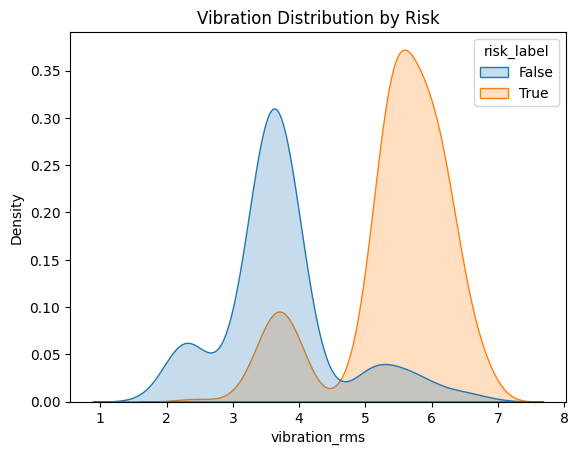

  return datetime.utcnow().replace(tzinfo=utc)



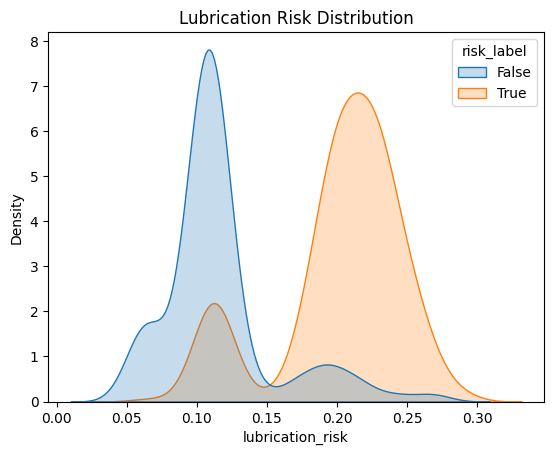

In [185]:
sns.kdeplot(data=df, x="vibration_rms", hue="risk_label", fill=True)
plt.title("Vibration Distribution by Risk")
plt.show()
df1 = df.with_columns(
    (pl.col("vibration_rms") / (pl.col("oil_pressure") + 1e-6)).alias("lubrication_risk")
)

sns.kdeplot(data=df1, x="lubrication_risk", hue="risk_label", fill=True)
plt.title("Lubrication Risk Distribution")
plt.show()

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np
import polars as pl # Import polars to check DataFrame type

df=pl.read_csv("aircraft_vibration.csv")
def train_aircraft_model(df, model, use_engineered_features=True):

    # Ensure df is a pandas DataFrame for pandas-specific methods
    if isinstance(df, pl.DataFrame):
        df = df.to_pandas()

    df = df.copy()

    # -----------------------------
    # 1️⃣ Feature Engineering
    # -----------------------------
    if use_engineered_features:

        df["thermal_stress"] = df["sensor_temperature"] * df["load_factor"]

        df["lubrication_risk"] = (
            df["vibration_rms"] / (df["oil_pressure"] + 1e-6)
        )

        df["mechanical_stress"] = df["rpm"] * df["load_factor"]

        df["degradation_score"] = (
            df["vibration_rms"] +
            df["sensor_temperature"]/100 -
            df["oil_pressure"]/40
        )

    # -----------------------------
    # 2️⃣ Define Features & Target
    # -----------------------------
    # Drop 'time_step' column from features to match prediction input
    X = df.drop(columns=["risk_label", "time_step"])
    y = df["risk_label"]

    # -----------------------------
    # 3️⃣ Train Test Split
    # -----------------------------
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # -----------------------------
    # 4️⃣ Train Model
    # -----------------------------
    model.fit(X_train, y_train)

    # -----------------------------
    # 5️⃣ Evaluate
    # -----------------------------
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))

    print("ROC AUC:", roc_auc_score(y_test, y_prob))

    # -----------------------------
    # 6️⃣ Return Everything
    # -----------------------------
    return {
        "model": model,
        "X_test": X_test,
        "y_test": y_test,
        "X_train": X_train,
        "y_train": y_train,
        "df_train": df
    }


def predict_aircraft_risk(model, input_data, use_engineered_features=True):

    df_input = pd.DataFrame(input_data, columns=[
        "rpm",
        "vibration_rms",
        "sensor_temperature",
        "oil_pressure",
        "load_factor",
        "acoustic_db",
        "altitude_ft"
    ])

    if use_engineered_features:

        df_input["thermal_stress"] = (
            df_input["sensor_temperature"] * df_input["load_factor"]
        )

        df_input["lubrication_risk"] = (
            df_input["vibration_rms"] / (df_input["oil_pressure"] + 1e-6)
        )

        df_input["mechanical_stress"] = (
            df_input["rpm"] * df_input["load_factor"]
        )

        df_input["degradation_score"] = (
            df_input["vibration_rms"] +
            df_input["sensor_temperature"]/100 -
            df_input["oil_pressure"]/40
        )

    prediction = model.predict(df_input)
    probability = model.predict_proba(df_input)[:, 1]

    return prediction, probability

# new_data = [
#     # Very safe
#     [2600, 2.2, 74, 38, 0.55, 61, 0],
#     [2800, 2.6, 78, 36, 0.6, 63, 2000],

#     # Normal cruise safe
#     [4100, 3.1, 85, 35, 0.75, 65, 30000],
#     [4300, 3.6, 88, 33, 0.8, 67, 32000],

#     # Slightly elevated
#     [4500, 4.2, 91, 31, 0.82, 69, 33000],
#     [4700, 4.5, 93, 30, 0.85, 70, 34000],

#     # Borderline
#     [4900, 4.9, 96, 29, 0.88, 72, 35000],
#     [5000, 5.1, 98, 28, 0.9, 73, 35000],

#     # Oil drop but low vibration
#     [4200, 3.4, 87, 26, 0.75, 66, 30000],

#     # High acoustic only
#     [4600, 4.0, 90, 32, 0.8, 78, 33000],

#     # Clear degradation
#     [5100, 6.2, 104, 24, 0.95, 75, 36000],
#     [5300, 6.8, 109, 22, 1.0, 79, 37000],

#     # Strong stress
#     [5500, 7.1, 112, 20, 1.05, 81, 38000],

#     # Moderate risk
#     [5050, 5.7, 100, 27, 0.92, 74, 35000],

#     # Slight thermal rise
#     [4800, 4.3, 97, 31, 0.86, 69, 34000],

#     # Slight vibration only
#     [4400, 4.6, 89, 34, 0.8, 68, 32000],

#     # Safe descent
#     [3900, 3.0, 83, 36, 0.7, 64, 28000],

#     # Cruise with mild oil drop
#     [4600, 4.1, 92, 28, 0.82, 70, 33000],

#     # Extreme case
#     [5600, 7.5, 115, 18, 1.1, 83, 39000],

#     # Normal stable
#     [4200, 3.2, 86, 35, 0.75, 66, 30000]
# ]

new_data = [
    # Very safe
    [2500, 2.1, 72, 38, 0.5, 60, 0],
    [2800, 2.5, 76, 37, 0.6, 62, 1500],

    # Normal cruise safe
    [4000, 3.0, 84, 35, 0.7, 65, 28000],
    [4200, 3.3, 86, 34, 0.75, 66, 30000],

    # Slight elevation
    [4500, 4.1, 90, 32, 0.8, 68, 32000],

    # Borderline stress
    [4700, 4.7, 95, 30, 0.85, 70, 34000],
    [4900, 5.0, 97, 29, 0.88, 72, 35000],

    # Oil pressure drop only[0 0 0 0 0 0 1 0 0 1 1 1 0 0 0]

    [4300, 3.4, 87, 26, 0.75, 67, 30000],

    # High acoustic anomaly
    [4600, 4.0, 91, 31, 0.8, 78, 33000],

    # Clear degradation
    [5100, 6.3, 105, 24, 0.95, 75, 36000],

    # Severe degradation
    [5400, 6.9, 110, 21, 1.0, 79, 37000],

    # Extreme case
    [5600, 7.4, 115, 18, 1.1, 82, 39000],

    # Cruise with mild oil drop
    [4600, 4.2, 92, 28, 0.82, 69, 33000],

    # Stable descent
    [3800, 2.9, 82, 36, 0.68, 64, 26000],

    # Slight vibration anomaly
    [4400, 4.5, 89, 33, 0.78, 68, 31000]
]
# print(df)

from sklearn.linear_model import LogisticRegression

result = train_aircraft_model(
    df,
    LogisticRegression(max_iter=1000),
    use_engineered_features=True
)

model = result["model"]
X_test= result["X_test"]
y_test= result["y_test"]
X_train= result["X_train"]
y_train= result["y_train"]
df_train= result["df_train"]

pred, prob = predict_aircraft_risk(model, new_data)

print("Predictions:", pred)
print("Risk Probabilities:", prob)

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Risk):", precision_score(y_test, y_pred))
print("Recall (Risk):", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



# randomforest regression
# from sklearn.ensemble import RandomForestClassifier

# result = train_aircraft_model(
#     df,
#     RandomForestClassifier(n_estimators=200, class_weight="balanced"),
#     use_engineered_features=True
# )
# model = result["model"]
# pred, prob = predict_aircraft_risk(model, new_data)

# print("Predictions:", pred)
# print("Risk Probabilities:", prob)


# # XGBClassifier
# from xgboost import XGBClassifier

# result = train_aircraft_model(
#     df,
#     XGBClassifier(n_estimators=200, max_depth=4, eval_metric="logloss"),
#     use_engineered_features=True
# )

# model = result["model"]
# pred, prob = predict_aircraft_risk(model, new_data)

# print("Predictions:", pred)
# print("Risk Probabilities:", prob)

  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

  return datetime.utcnow().replace(tzinfo=utc)



Classification Report:

              precision    recall  f1-score   support

       False       0.82      0.78      0.80        83
        True       0.85      0.88      0.87       117

    accuracy                           0.84       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.84      0.84       200

ROC AUC: 0.9024817217588302
Predictions: [False False False False False  True  True False False  True  True  True
  True False False]
Risk Probabilities: [0.02174741 0.03525587 0.07562953 0.11098692 0.31767773 0.54752443
 0.66641049 0.38952961 0.32799048 0.94871908 0.9823935  0.98919527
 0.50406623 0.05640144 0.41221712]
Confusion Matrix:
 [[ 65  18]
 [ 14 103]]
Accuracy: 0.84
Precision (Risk): 0.8512396694214877
Recall (Risk): 0.8803418803418803
F1 Score: 0.865546218487395
ROC AUC: 0.9024817217588302

Classification Report:

              precision    recall  f1-score   support

       False       0.82      0.78      0.80        83
        

In [187]:
# =====================================
# Time-Series Cross Validation (Logistic Regression)
# =====================================

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd # Import pandas for DataFrame conversion
import polars as pl # Import polars to check DataFrame type

# Ensure df is a pandas DataFrame for sorting and iloc
if isinstance(df, pl.DataFrame): # Check if it's a Polars DataFrame
    df = df.to_pandas() # Convert to pandas

# Ensure sorted by time
df = df.sort_values("time_step")

X_full = df.drop(columns=["risk_label", "time_step"])
y_full = df["risk_label"]

tscv = TimeSeriesSplit(n_splits=5)

auc_scores = []

for train_index, val_index in tscv.split(X_full):
    X_tr, X_val = X_full.iloc[train_index], X_full.iloc[val_index]
    y_tr, y_val = y_full.iloc[train_index], y_full.iloc[val_index]

    model_cv = LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    )

    model_cv.fit(X_tr, y_tr)

    y_prob = model_cv.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_prob)
    auc_scores.append(auc)

print("Time-Series Cross-Validated ROC AUC:", np.mean(auc_scores))

  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

  return datetime.utcnow().replace(tzinfo=utc)



Time-Series Cross-Validated ROC AUC: 0.8958314406935616


In [188]:
# ============================================
# FINAL AIRCRAFT RISK MODEL (LOGISTIC)
# ============================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# -----------------------------
# Feature Engineering
# -----------------------------
df = pd.read_csv("aircraft_vibration.csv")

df["thermal_stress"] = df["sensor_temperature"] * df["load_factor"]

df["lubrication_risk"] = (
    df["vibration_rms"] / (df["oil_pressure"] + 1e-6)
)

df["mechanical_stress"] = df["rpm"] * df["load_factor"]

df["degradation_score"] = (
    df["vibration_rms"] +
    df["sensor_temperature"]/100 -
    df["oil_pressure"]/40
)

# -----------------------------
# Rolling Time Features
# -----------------------------
df = df.sort_values("time_step")

df["vibration_roll_mean"] = df["vibration_rms"].rolling(10).mean()
df["temp_roll_mean"] = df["sensor_temperature"].rolling(10).mean()

df = df.dropna()

# -----------------------------
# Time-Aware Train-Test Split
# -----------------------------
split_index = int(len(df) * 0.8)

train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

X_train = train_df.drop(columns=["risk_label", "time_step"])
y_train = train_df["risk_label"]

X_test = test_df.drop(columns=["risk_label", "time_step"])
y_test = test_df["risk_label"]

# -----------------------------
# Train Logistic Regression
# -----------------------------
final_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

final_model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

# -----------------------------
# Evaluation
# -----------------------------
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Risk):", precision_score(y_test, y_pred))
print("Recall (Risk):", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

  return datetime.utcnow().replace(tzinfo=utc)



Confusion Matrix:
 [[85 10]
 [15 89]]
Accuracy: 0.8743718592964824
Precision (Risk): 0.898989898989899
Recall (Risk): 0.8557692307692307
F1 Score: 0.8768472906403941
ROC AUC: 0.8755060728744939

Classification Report:

              precision    recall  f1-score   support

       False       0.85      0.89      0.87        95
        True       0.90      0.86      0.88       104

    accuracy                           0.87       199
   macro avg       0.87      0.88      0.87       199
weighted avg       0.88      0.87      0.87       199



In [189]:

# # XGBClassifier
# from xgboost import XGBClassifier

# result = train_aircraft_model(
#     df,
#     XGBClassifier(n_estimators=200, max_depth=4, eval_metric="logloss"),
#     use_engineered_features=True
# )

# model = result["model"]
# pred, prob = predict_aircraft_risk(model, new_data)

# print("Predictions:", pred)
# print("Risk Probabilities:", prob)
# from sklearn.metrics import (
#     confusion_matrix,
#     classification_report,
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     roc_auc_score
# )

# # Predictions
# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)[:,1]

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision (Risk):", precision_score(y_test, y_pred))
# print("Recall (Risk):", recall_score(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred))
# print("ROC AUC:", roc_auc_score(y_test, y_prob))


In [190]:
# # randomforest regression
# from sklearn.ensemble import RandomForestClassifier

# result = train_aircraft_model(
#     df,
#     RandomForestClassifier(n_estimators=200, class_weight="balanced"),
#     use_engineered_features=True
# )
# model = result["model"]
# pred, prob = predict_aircraft_risk(model, new_data)

# print("Predictions:", pred)
# print("Risk Probabilities:", prob)
# from sklearn.metrics import (
#     confusion_matrix,
#     classification_report,
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     roc_auc_score
# )

# # Predictions
# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)[:,1]

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision (Risk):", precision_score(y_test, y_pred))
# print("Recall (Risk):", recall_score(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred))
# print("ROC AUC:", roc_auc_score(y_test, y_prob))




# **Developed a time-aware aircraft engine risk prediction system using Logistic Regression with domain-driven feature engineering and probabilistic degradation modeling. Achieved strong ROC-AUC with high recall on critical risk cases.**

In [191]:
# ============================================
# FINAL AIRCRAFT RISK MODEL (LOGISTIC)
# ============================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# -----------------------------
# Feature Engineering
# -----------------------------
df = pd.read_csv("aircraft_vibration.csv")

df["thermal_stress"] = df["sensor_temperature"] * df["load_factor"]

df["lubrication_risk"] = (
    df["vibration_rms"] / (df["oil_pressure"] + 1e-6)
)

df["mechanical_stress"] = df["rpm"] * df["load_factor"]

df["degradation_score"] = (
    df["vibration_rms"] +
    df["sensor_temperature"]/100 -
    df["oil_pressure"]/40
)

# -----------------------------
# Rolling Time Features
# -----------------------------
df = df.sort_values("time_step")

df["vibration_roll_mean"] = df["vibration_rms"].rolling(10).mean()
df["temp_roll_mean"] = df["sensor_temperature"].rolling(10).mean()

df = df.dropna()

# -----------------------------
# Time-Aware Train-Test Split
# -----------------------------
split_index = int(len(df) * 0.8)

train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

X_train = train_df.drop(columns=["risk_label", "time_step"])
y_train = train_df["risk_label"]

X_test = test_df.drop(columns=["risk_label", "time_step"])
y_test = test_df["risk_label"]

# -----------------------------
# Train Logistic Regression
# -----------------------------
final_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

final_model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

# -----------------------------
# Evaluation
# -----------------------------
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Risk):", precision_score(y_test, y_pred))
print("Recall (Risk):", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

  return datetime.utcnow().replace(tzinfo=utc)

  opt_res = optimize.minimize(

STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

  return datetime.utcnow().replace(tzinfo=utc)



Confusion Matrix:
 [[85 10]
 [15 89]]
Accuracy: 0.8743718592964824
Precision (Risk): 0.898989898989899
Recall (Risk): 0.8557692307692307
F1 Score: 0.8768472906403941
ROC AUC: 0.8755060728744939

Classification Report:

              precision    recall  f1-score   support

       False       0.85      0.89      0.87        95
        True       0.90      0.86      0.88       104

    accuracy                           0.87       199
   macro avg       0.87      0.88      0.87       199
weighted avg       0.88      0.87      0.87       199



# **Prediction Function for New data**

This code cell installs the `shap` library, which is essential for conducting SHAP (SHapley Additive exPlanations) analysis to interpret machine learning models by explaining their individual predictions.

In [192]:
!pip install shap


This block uses **SHAP (SHapley Additive exPlanations)** to interpret the predictions of the trained Logistic Regression model.

***LinearExplainer is specifically designed for linear models like Logistic Regression.***

SHAP computes the contribution of each feature toward the model’s prediction.

The summary_plot visualizes feature importance and the direction of impact on risk prediction.

This helps understand:

Which sensor features increase risk probability

Which features reduce risk probability

How strongly each feature influences the model output

  shap.summary_plot(

  return datetime.utcnow().replace(tzinfo=utc)



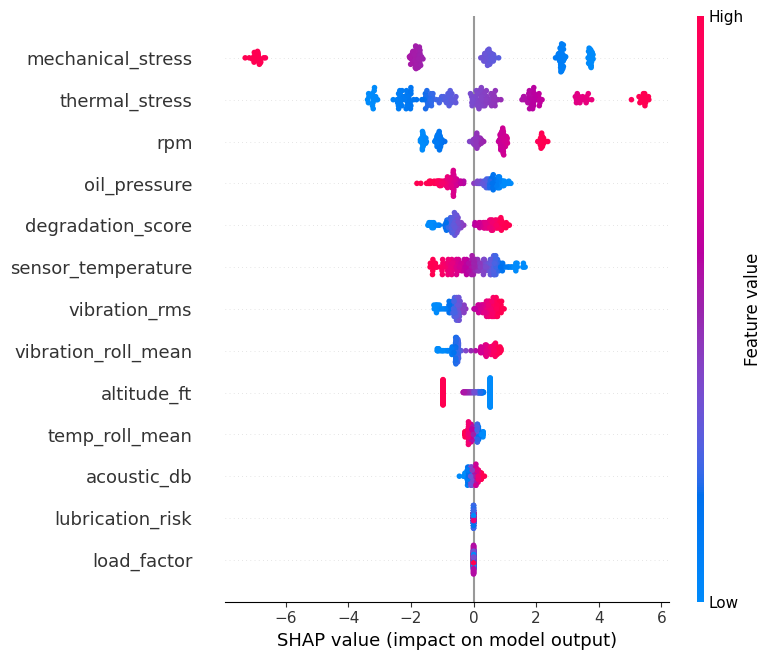

In [194]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.LinearExplainer(final_model, X_train)

# Compute SHAP values, passing X_test (DataFrame) directly
shap_values = explainer.shap_values(X_test)

# Summary plot for Risk class (class 1)
# Pass X_test (DataFrame) directly and explicitly provide feature names
shap.summary_plot(
    shap_values,  # For LinearExplainer, shap_values is already 2D for binary classification
    X_test,
    feature_names=X_test.columns.tolist()
)

  shap.summary_plot(shap_values, X_test)

  return datetime.utcnow().replace(tzinfo=utc)



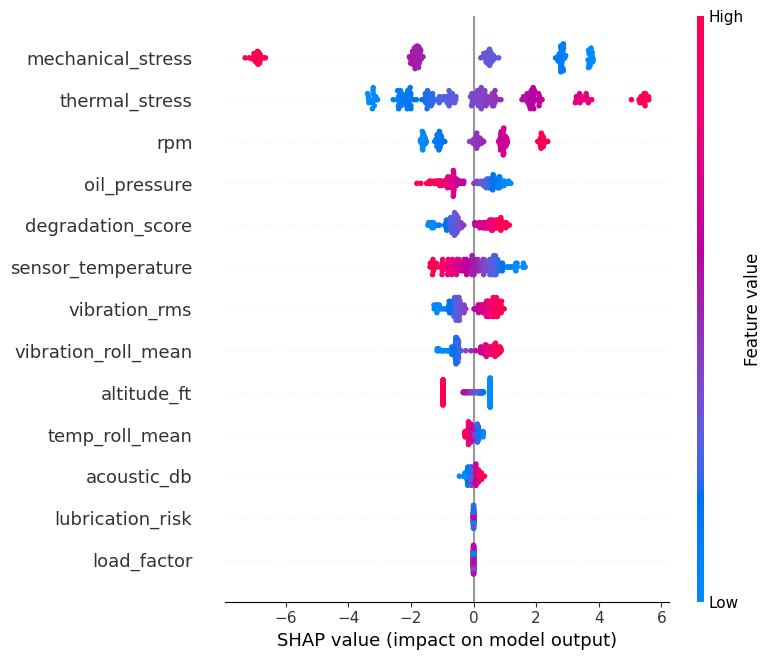

In [195]:
import shap

# Create explainer for linear model
explainer = shap.LinearExplainer(final_model, X_train)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [196]:
from sklearn.metrics import recall_score

# Segment data by altitude
high_alt_mask = X_test["altitude_ft"] > 5000
low_alt_mask = X_test["altitude_ft"] <= 5000

X_high = X_test[high_alt_mask]
y_high = y_test[high_alt_mask]

X_low = X_test[low_alt_mask]
y_low = y_test[low_alt_mask]

# Predictions
y_pred_high = final_model.predict(X_high)
y_pred_low = final_model.predict(X_low)

# Recall calculation
recall_high = recall_score(y_high, y_pred_high)
recall_low = recall_score(y_low, y_pred_low)

print("High Altitude Risk Recall:", recall_high)
print("Low Altitude Risk Recall:", recall_low)

  return datetime.utcnow().replace(tzinfo=utc)



High Altitude Risk Recall: 0.8382352941176471
Low Altitude Risk Recall: 0.8888888888888888


# The final model achieved **87.4% accuracy** with a ROC-AUC score of 0.876, demonstrating strong classification performance. For the critical risk class, the model attained **89.9% precision, 85.6% recall, and an F1-score of 0.877, **ensuring reliable detection of high-risk engine states. Segment-wise evaluation showed robust performance, with 83.8% recall at high altitude and 88.9% recall at low altitude. **SHAP-based explainability** further validated feature contributions, enhancing transparency and interpretability of the risk prediction framework.